In [1]:
import pandas as pd
final_df = pd.read_csv("final_data_to_train.csv")
final_df.head()

,meterId,sourceId,totalVehicles,provinceId,municipalityId,latitude,longitude,year,month,day,hour,minute
0,123,1,166,48,11,43.1954,-2.8954,2022,5,10,17,30
1,118,1,160,48,11,43.1954,-2.8954,2022,5,10,18,0
2,119,1,242,48,11,43.1954,-2.8954,2022,5,10,18,0
3,120,1,94,48,11,43.1954,-2.8954,2022,5,10,18,0
4,122,1,419,48,11,43.1954,-2.8954,2022,5,10,18,0


In [22]:
df_id1_2023 = pd.read_csv('flow_2023_id1/flow_2023_3_id1.csv')
df_id5_2023 = pd.read_csv('flow_2023_id5/flow_2023_3_id5.csv')
df_id6_2023 = pd.read_csv('flow_2023_id1/flow_2023_3_id1.csv')

EmptyDataError: No columns to parse from file

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import xgboost as xgb

X = final_df.drop(columns='totalVehicles')
y = final_df['totalVehicles']

numerical_vars = ['meterId', 'sourceId', 'provinceId', 'municipalityId', 'latitude', 'longitude', 'year', 'month',
                  'day', 'hour', 'minute']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessor initiated")
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_vars)]
)
print("Preprocessor ready")

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(learning_rate=0.1, max_depth=15, n_estimators=250))
])

print("Fitting pipeline")
pipeline.fit(X_train, y_train)
print("pipeline fitted")

y_pred = pipeline.predict(X_test)
print("Predictions done, calculating results")

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)

Preprocessor initiated
Preprocessor ready
Fitting pipeline
[20:10:05] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/gbm/gbtree.cc:149: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[20:10:05] DEBUG: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/gbm/gbtree.cc:157: Using tree method: 1
[20:10:05] DEBUG: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/gbm/gbtree.cc:122: Using updaters: grow_histmaker
[20:10:05] ======== Monitor (0): TreePruner ========
[20:10:05] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/data/simple_dmatrix.cc:103: Generating new Gradient Index.
[20:10:07] ======== Monitor (0): HostSketchContainer ========
[20:10:07] AllRed




[21:07:28] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/gbm/gbtree.cc:149: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[21:07:28] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/data/simple_dmatrix.cc:103: Generating new Gradient Index.
Mean Absolute Error (MAE): 39.829103710067216
Root Mean Squared Error: 151.12985824680945
R-squared (R2) Score: 0.8119520161479306
[21:19:11] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/gbm/gbtree.cc:149: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[21:19:11] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/data/simple_dmatrix.cc:103: Generating new Gradient Index.
Mean Absolute Error (MAE): 39.41490500686876
Root Mean Squared Error: 152.48055852431978
R-squared (R2) Score: 0.8085756946923665
[21:30:40] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/gbm/gbtree.cc:149: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[21:30:40] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/data/simple_dmatrix.cc:103: Generating new Gradient Index.
Mean Absolute Error (MAE): 39.29073684277533
Root Mean Squared Error: 154.1025212624149
R-squared (R2) Score: 0.8044816065641709

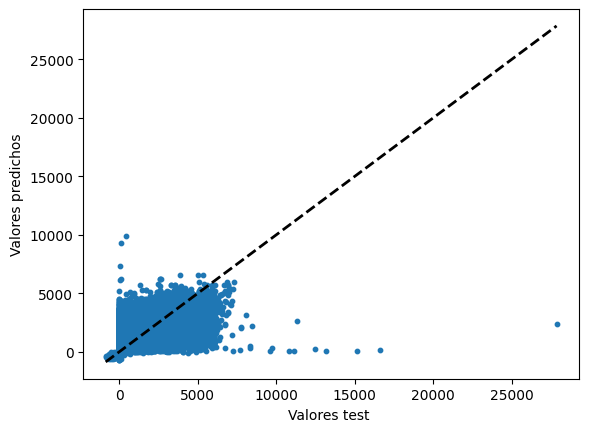

In [3]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Valores test ')
plt.ylabel('Valores predichos')
plt.show()

In [4]:
predicted_data = X_test[['meterId','latitude', 'longitude', 'month']].copy()
predicted_data['PredictedValues'] = y_pred  # Assuming y_pred contains the predicted values
predicted_data.reset_index(drop=True, inplace=True)

# Filter predicted_data for month 6
predicted_data_month6 = predicted_data[predicted_data['month'] == 6]
print(predicted_data_month6['PredictedValues'].max())
print(predicted_data_month6['PredictedValues'].min())
predicted_data_month6['PredictedValues'] = predicted_data_month6['PredictedValues'].clip(lower=1)
print(predicted_data_month6['PredictedValues'].min())

6215.751
-562.1958
1.0


/var/folders/gh/yt97y6vj0_79f2lwfvsdnjpw0000gn/T/ipykernel_42115/3107372175.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_data_month6['PredictedValues'] = predicted_data_month6['PredictedValues'].clip(lower=1)


In [23]:
import plotly.graph_objects as go
from plotly.offline import plot
import numpy as np

scaling_factor = 1.5

# Apply logarithmic scaling to the 'PredictedValues' column
log_scaled_values = np.log1p(predicted_data_month6['PredictedValues'])
scaled_values = log_scaled_values * scaling_factor

# Define the range for the colorscale
z_min = scaled_values.min()
z_max = scaled_values.max()

fig = go.Figure(go.Densitymapbox(
    lat=predicted_data_month6['latitude'],
    lon=predicted_data_month6['longitude'],
    z=scaled_values,
    radius=scaled_values + 1,
    colorscale='Jet',
    opacity=0.75,
    showscale=False,
    zmin=z_min,  # Set the minimum value of the colorscale
    zmax=z_max   # Set the maximum value of the colorscale
))

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    mapbox_center={"lat": 43.1167, "lon": -2.55},
    mapbox_zoom=9.25
)

# Generate an HTML file with the plot
plot(fig, filename='density_map_forall_month6.html')


'density_map_forall_month6.html'